<a href="https://colab.research.google.com/github/basangoudapatil/Task---6/blob/main/Assignment8_ipynb(Basangouda_patil).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [3]:
df = pd.read_csv("car_data.csv")
print(df)

            Price  Mileage    Make     Model           Trim   Type  Cylinder  \
0    17314.103129     8221   Buick   Century       Sedan 4D  Sedan         6   
1    17542.036083     9135   Buick   Century       Sedan 4D  Sedan         6   
2    16218.847862    13196   Buick   Century       Sedan 4D  Sedan         6   
3    16336.913140    16342   Buick   Century       Sedan 4D  Sedan         6   
4    16339.170324    19832   Buick   Century       Sedan 4D  Sedan         6   
..            ...      ...     ...       ...            ...    ...       ...   
799  16507.070267    16229  Saturn  L Series  L300 Sedan 4D  Sedan         6   
800  16175.957604    19095  Saturn  L Series  L300 Sedan 4D  Sedan         6   
801  15731.132897    20484  Saturn  L Series  L300 Sedan 4D  Sedan         6   
802  15118.893228    25979  Saturn  L Series  L300 Sedan 4D  Sedan         6   
803  13585.636802    35662  Saturn  L Series  L300 Sedan 4D  Sedan         6   

     Liter  Doors  Cruise  Sound  Leath

In [4]:
df.shape

(804, 12)

In [5]:
df[['Price','Mileage']].isnull().sum(), df[['Price','Mileage']].isna().sum()

(Price      0
 Mileage    0
 dtype: int64, Price      0
 Mileage    0
 dtype: int64)

In [6]:
df[['Price','Mileage']].shape
df[['Price','Mileage']].dtypes

Price      float64
Mileage      int64
dtype: object

In [7]:
df[['Price','Mileage']].describe()

,Price,Mileage
count,804.000000,804.000000
mean,21343.143767,19831.934080
std,9884.852801,8196.319707
min,8638.930895,266.000000
25%,14273.073870,14623.500000
50%,18024.995019,20913.500000
75%,26717.316636,25213.000000
max,70755.466717,50387.000000


In [8]:
#IQR Method for checking Outliers
#Price
Q3 = df['Price'].quantile(0.75)
Q1 = df['Price'].quantile(0.25)

IQR = Q3 - Q1

Upper_Threshold = Q3 + 1.5*IQR
Lower_Threshold = Q1 - 1.5*IQR

print(Upper_Threshold)
print(Lower_Threshold)

45383.68078365926
-4393.290277667038


In [9]:
#IQR Method for checking Outliers
#Price
Q3_1 = df['Mileage'].quantile(0.75)
Q1_1 = df['Mileage'].quantile(0.25)

IQR1 = Q3_1 - Q1_1

Upper_Threshold1 = Q3_1 + 1.5*IQR1
Lower_Threshold1 = Q1_1 - 1.5*IQR1

print(Upper_Threshold1)
print(Lower_Threshold1)

41097.25
-1260.75


In [10]:
df.groupby('Mileage')['Price'].mean()

Mileage
266      10813.343521
583      70755.466717
636      25948.962594
788      48310.329545
865      16116.843916
             ...     
41566    15792.831437
41829    32537.186751
42691    52001.994379
48991    28777.959695
50387    22244.876553
Name: Price, Length: 791, dtype: float64

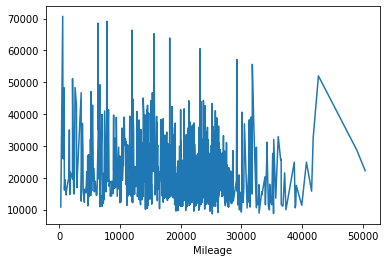

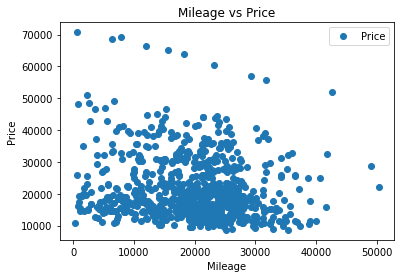

In [11]:
df.groupby('Mileage')['Price'].mean().plot()
import matplotlib.pyplot as plt
df.plot(x='Mileage', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [12]:
df[['Mileage','Price']].corr() # there is little to no corelation the model requires to consider more feature variables to compute regression

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


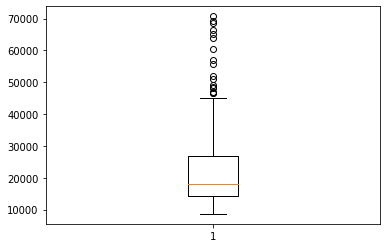

In [13]:
#BOX PLOT
plt.boxplot(df['Price'])
plt.show()

In [14]:
target = df.loc[df['Price']>45383.6807]
print(target)

            Price  Mileage       Make     Model             Trim         Type  \
80   51154.047216     2202   Cadillac     CST-V         Sedan 4D        Sedan   
81   49248.158967     6685   Cadillac     CST-V         Sedan 4D        Sedan   
82   46747.673270    15343   Cadillac     CST-V         Sedan 4D        Sedan   
140  48310.329545      788   Cadillac    STS-V8         Sedan 4D        Sedan   
141  48365.980897     2616   Cadillac    STS-V8         Sedan 4D        Sedan   
150  70755.466717      583   Cadillac    XLR-V8  Hardtop Conv 2D  Convertible   
151  68566.187189     6420   Cadillac    XLR-V8  Hardtop Conv 2D  Convertible   
152  69133.731722     7892   Cadillac    XLR-V8  Hardtop Conv 2D  Convertible   
153  66374.307040    12021   Cadillac    XLR-V8  Hardtop Conv 2D  Convertible   
154  65281.481237    15600   Cadillac    XLR-V8  Hardtop Conv 2D  Convertible   
155  63913.117248    18200   Cadillac    XLR-V8  Hardtop Conv 2D  Convertible   
156  60567.549093    23193  

**TASK - 1**

In [15]:
#Preparing data
from sklearn.model_selection import train_test_split

X = df[['Price']].values
y = df['Mileage'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
#MODEL TRAINING
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [18]:
print(regressor.coef_)
print(regressor.intercept_) 

[-1503.9361405]
19721.22706065319


In [19]:
y_pred = regressor.predict(X_test_scaled)
print(y_pred[0:5])

[20912.37594844 19047.2246611  18738.61724206 21080.44178294
 17575.83356911]


In [20]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df1)

     Actual     Predicted
0     20043  20912.375948
1     36480  19047.224661
2     26126  18738.617242
3     23512  21080.441783
4     13449  17575.833569
..      ...           ...
156   16950  19808.947393
157   17830  20985.456653
158   10003  18846.627239
159   33906  20667.310522
160   18277  20330.669806

[161 rows x 2 columns]


In [21]:
from sklearn import metrics
print('R2 SCORE:', metrics.r2_score(y_test, y_pred))

R2 SCORE: -0.036118572640879476


**Task - 2** - Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [22]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [23]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [47]:
#Considering the above correlation table and the above regression model, Price and Model are not related at all. 
#I drop the variable, whereas, cylider, liter, Cruise, whose values are greater than 0.2 or -0.2, no transformation is required. Sound, Doors and Leather require transformation.

df['Doorstrans'] = np.power(df['Doors'],1)
print(df['Doorstrans'])
df[['Doorstrans','Price']].corr()
#Doors and Price cannot be used for analysis

0      4
1      4
2      4
3      4
4      4
      ..
799    4
800    4
801    4
802    4
803    4
Name: Doorstrans, Length: 804, dtype: int64


,Doorstrans,Price
Doorstrans,1.00000,-0.13875
Price,-0.13875,1.00000


In [25]:
#Leather
df['LeatherTrans'] = np.power(df['Leather'],3)
df[['LeatherTrans','Price']].corr()
#Leather is either 0 or 1, the square or cube or root would yield the same correlation, it is less than 0.2, drop it, same with sound.

,LeatherTrans,Price
LeatherTrans,1.000000,0.157197
Price,0.157197,1.000000


In [26]:
df.columns 
#Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Doorstrans',
       'LeatherTrans'],
      dtype='object')

In [27]:
#SPLIT DATASET
from sklearn.model_selection import train_test_split

X = df[['Cylinder','Liter','Cruise','Mileage','Doors','Sound','Leather']].values
y = df['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
#MODEL TRAINING
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [30]:
y_pred = regressor.predict(X_test_scaled)
print(y_pred[0:5])

[22094.96039593 23789.92671265 18793.50767846 17542.77007036
 12060.10887494]


In [31]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df1)

           Actual     Predicted
0    16569.141240  22094.960396
1    21341.257207  23789.926713
2    31002.734420  18793.507678
3    27610.864203  17542.770070
4    14568.002255  12060.108875
..            ...           ...
156  13446.213415  15257.765791
157  13161.942828  17983.690270
158  17789.346731  20254.851540
159  19646.717478  24444.662335
160  38167.173577  24310.580513

[161 rows x 2 columns]


In [32]:
from sklearn import metrics
print('R2 SCORE:', metrics.r2_score(y_test, y_pred))

R2 SCORE: 0.3277880321531993


**Task - 3** - Research dummy variables in scikit-learn to see how to use the make, model, and body type.



In [33]:
df.corr()['Price']

Price           1.000000
Mileage        -0.143051
Cylinder        0.569086
Liter           0.558146
Doors          -0.138750
Cruise          0.430851
Sound          -0.124348
Leather         0.157197
Doorstrans     -0.138750
LeatherTrans    0.157197
Name: Price, dtype: float64

In [35]:
df_cylinder = df.groupby(by='Cylinder', as_index = False).mean()[['Cylinder','Price']]
df_cylinder

,Cylinder,Price
0,4,17862.564874
1,6,20081.395841
2,8,38968.043180


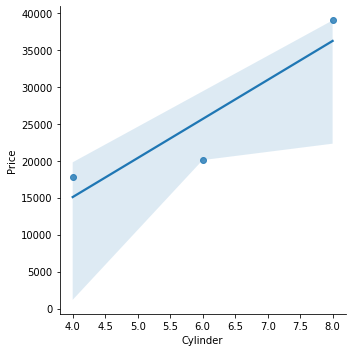

In [37]:
import seaborn as sns
sns.lmplot(x='Cylinder', y='Price', data = df_cylinder)

    Liter         Price
0     1.6  10752.833305
1     1.8  15881.386094
2     2.0  29968.972727
3     2.2  13441.277078
4     2.3  29288.283553
5     2.5  24960.948265
6     2.8  30455.144774
7     3.0  16550.926211
8     3.1  15989.528107
9     3.4  16238.093335
10    3.5  17788.263153
11    3.6  26150.134403
12    3.8  20158.316888
13    4.6  39535.972594
14    5.7  37076.585744
15    6.0  39155.712375


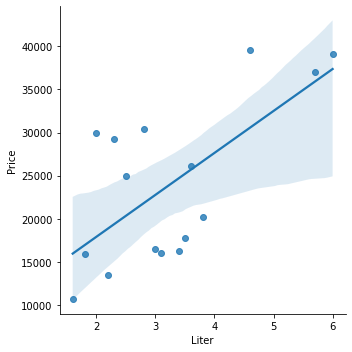

In [39]:
df_liter = df.groupby(by="Liter",as_index = False).mean()[["Liter","Price"]]
print(df_liter)
sns.lmplot(x="Liter", y="Price", data=df_liter)

   Cruise         Price
0       0  13921.865667
1       1  23784.192266


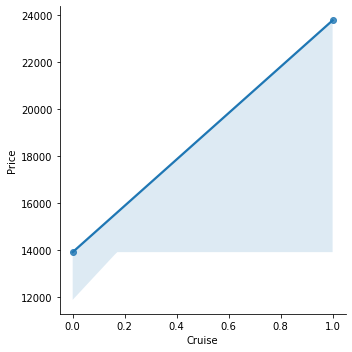

In [42]:
df_cruise = df.groupby(by="Cruise",as_index = False).mean()[["Cruise","Price"]]
print(df_cruise)
sns.lmplot(x="Cruise", y="Price", data=df_cruise)

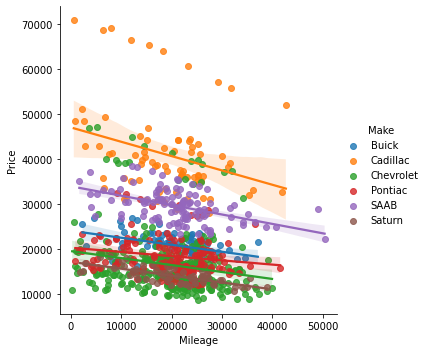

In [43]:
sns.lmplot(x="Mileage", y="Price", data=df, hue="Make")

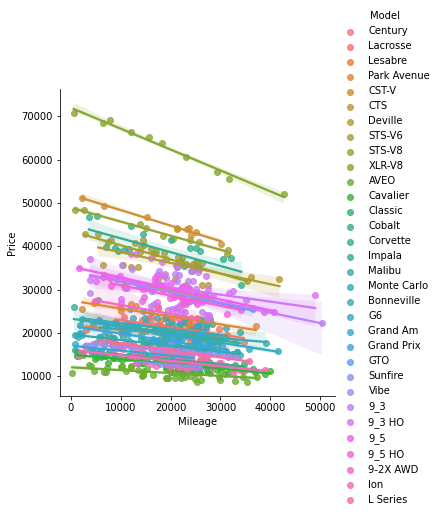

In [44]:
sns.lmplot(x="Mileage", y="Price", data=df, hue="Model")

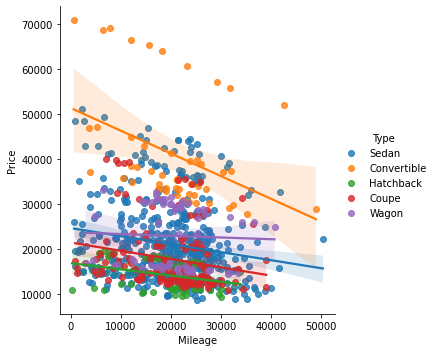

In [45]:
sns.lmplot(x="Mileage", y="Price", data=df, hue="Type")

From the above the graph we can conclude that there lies a relation between the price and mileage based on the type of vehile i.e., Sedan, Hatchback, etc.

In [48]:
df.head()1

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Doorstrans,LeatherTrans
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,4,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,4,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,4,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,4,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,4,1


In [50]:
X = df.drop('Price', axis=1)
y = df['Price']

In [51]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

In [52]:
print(X_train.shape), print(y_train.shape)

(643, 13)
(643,)


(None, None)

In [53]:
# Label encoding
from sklearn import preprocessing
cols = ["Make","Model","Trim","Type"]
le = preprocessing.LabelEncoder()
for name in cols:
  X_train[name]= le.fit_transform(X_train[name])
  X_test[name] = le.transform(X_test[name])

In [54]:
X_train.head()

,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Doorstrans,LeatherTrans
251,5189,2,9,26,1,4,2.2,2,0,1,1,2,1
239,30297,2,9,22,1,4,2.2,2,1,1,1,2,1
151,6420,1,31,20,0,8,4.6,2,1,1,1,2,1
299,28492,2,12,11,1,4,2.2,2,0,1,1,2,1
115,22211,1,14,14,3,8,4.6,4,1,0,1,4,1


In [55]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [56]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
print(model.coef_, model.intercept_)

R2- SCORE: 0.44732093128008166
[-1624.23839915  1038.65287722 -1603.40269028 -1334.11782674
   104.83554958  5735.01586711  -114.54600278  -467.52497027
  2187.77299389  -636.67529525   615.69363819  -467.52497027
   615.69363819] 21440.533387598927



 # Coefficients
 # Mileage: -1342 (5)
 # Make: 969 (8)
 # Model: -1678 (3)
 # Trim: -1585 (4)
 # Type: -88 (11)
 # Cylinder: 6703 (1)
 # Liter: -1072 (7)
 # Doors: -749 (9)
 # Cruise: 1956 (2)
 # Sound: -594 (10)
 # Leather: 1226 (6)

# 5 most important features to detrmine the features are
# Cylinder, Cruise, Model, Trim, Mileage